In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
import matplotlib

In [3]:
def maximum(x,y):
    max = np.argmax(y)
    return x[max]

In [4]:
data1 = np.loadtxt("data.csv")
data1

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [29]:
data1.shape

(7291, 257)

In [5]:
data = pd.DataFrame(data1)
data.head()

0    1    2    3      4      5      6      7      8      9    ...    247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ... -0.318   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.466   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 257 columns]

In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,:1]
#y.head()

# Q) 1) a)

In [71]:
inertia = []
s =[]
n_clusters = range(2,21)
for i in n_clusters:
    model  = KMeans(n_clusters = i,init = 'random', n_jobs = -1)
    model.fit(x)
    inertia.append(model.inertia_)
    clusters = model.labels_
    s.append(silhouette_score(x,clusters))

Text(0.5, 1.0, 'Figure 5.1')

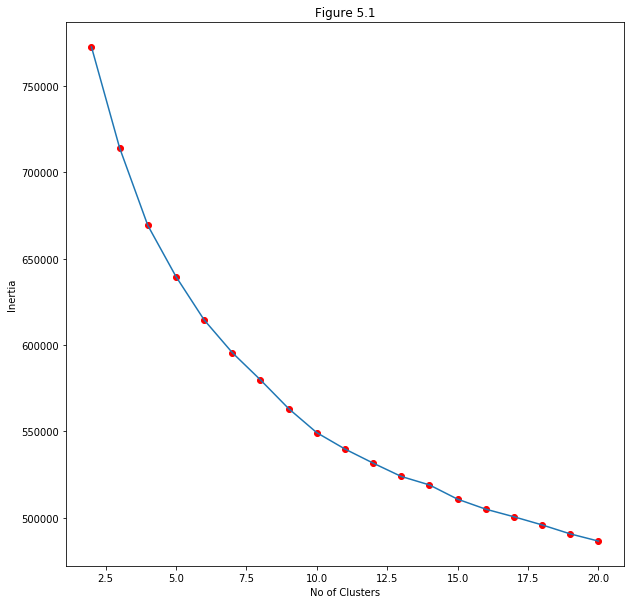

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(n_clusters, inertia, c = 'r')
ax.plot(n_clusters, inertia)
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.title("Figure 5.1")

# Q) 1) b)

# It seems like the optimal no of clusters is 13 from the Elbow approach

# Verifying using silhouette score. The optimal no of clusters have high silhouette score

Text(0.5, 1.0, 'Figure 5.1a')

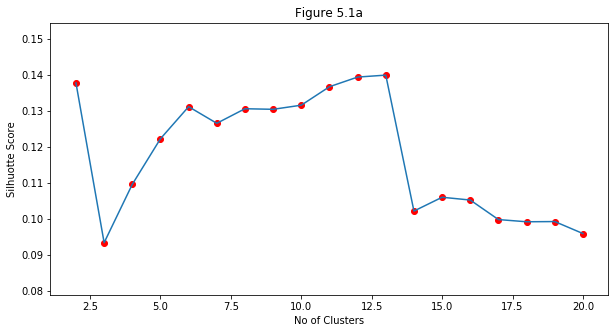

In [73]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n_clusters, s, c ='r')
ax.plot(n_clusters,s)
plt.xlabel("No of Clusters")
plt.ylabel("Silhuotte Score")
plt.title("Figure 5.1a")

In [74]:
maximum(n_clusters, s)

13

# Yes. I am right. The optimal no of clusters = 13

# Q) 1) c)

In [75]:
s2=[]
inertia2 = []
n_clusters = range(2,21)
for i in n_clusters:
    model  = KMeans(n_clusters = i,init = 'random', n_init = 1, max_iter = 1, n_jobs = -1)
    model.fit(x)
    inertia2.append(model.inertia_)
    clusters2 = model.labels_
    s2.append(silhouette_score(x,clusters2))

Text(0.5, 1.0, 'Figure 5.2')

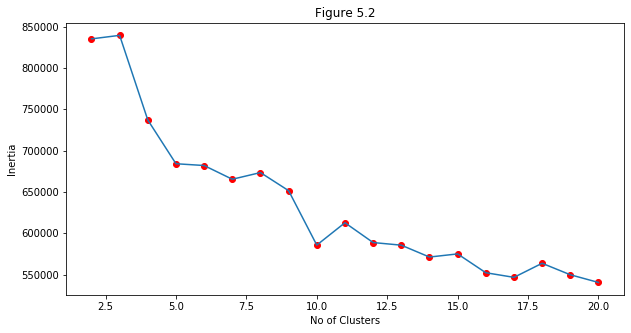

In [76]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n_clusters, inertia2, c = 'r')
ax.plot(n_clusters, inertia2)
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.title("Figure 5.2")

Text(0.5, 1.0, 'Figure 5.2a')

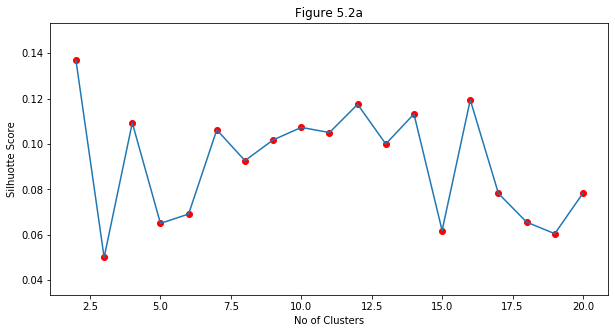

In [79]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n_clusters, s2, c ='r')
ax.plot(n_clusters,s2)
plt.xlabel("No of Clusters")
plt.ylabel("Silhuotte Score")
plt.title("Figure 5.2a")

In [80]:
maximum(n_clusters, s2)

2

# FOr this, the optimal no of clusters is 2

# Q) 1) d)

# The KMeans is dependent on the initial clusters. So,since we set n_init=1 which means KMeans only run once (only one random set of initial centroids) and max_iterations = 1, which means it iterates only once per run i.e. don't recalculate the centriods again and again. 
# Where as in the previous clustering model, it runs multiple times and picks best in terms of Inertia and also runs for multiple iterations for each run until the centriods don't change.
# Hence the Inertia for each no of clusters is higher than that of the previous model and the optimal no of clusters turned out to be different

# Q) 1) e)

In [81]:
iter = []
n_clusters = range(2,21)
for i in n_clusters:
    model  = KMeans(n_clusters = i,init = 'random',  n_jobs = -1)
    model.fit(x)
    iter.append(model.n_iter_)

Text(0.5, 1.0, 'Figure 5.3')

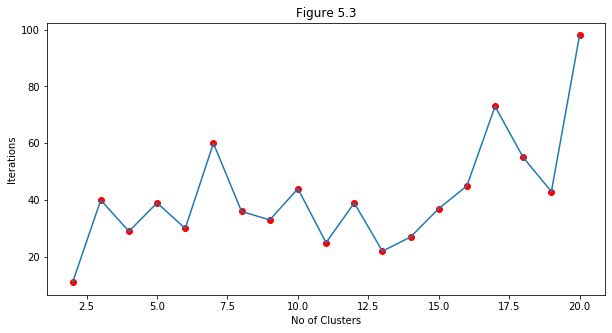

In [82]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n_clusters, iter, c = 'r')
ax.plot(n_clusters, iter)
plt.xlabel("No of Clusters")
plt.ylabel("Iterations")
plt.title("Figure 5.3")

# Q) 1) f)

# I think the number of iterations per run has no correlation with the no of clusters
# The above data supports that

# Q) 1) g)

# Graduate Student Question

In [83]:
# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data_g = np.loadtxt("data.csv")


In [84]:
data_g.shape

(7291, 257)

In [85]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data_g)


features = []
digits = []


for row in data_g:
    #import the data and select only the 1's and 5's
    features.append(row[1:])
    digits.append(str(row[0]))




In [86]:
model_g  = KMeans(n_clusters = 10,init = 'random',  n_jobs = -1)
labels_c = model_g.fit_predict(features)


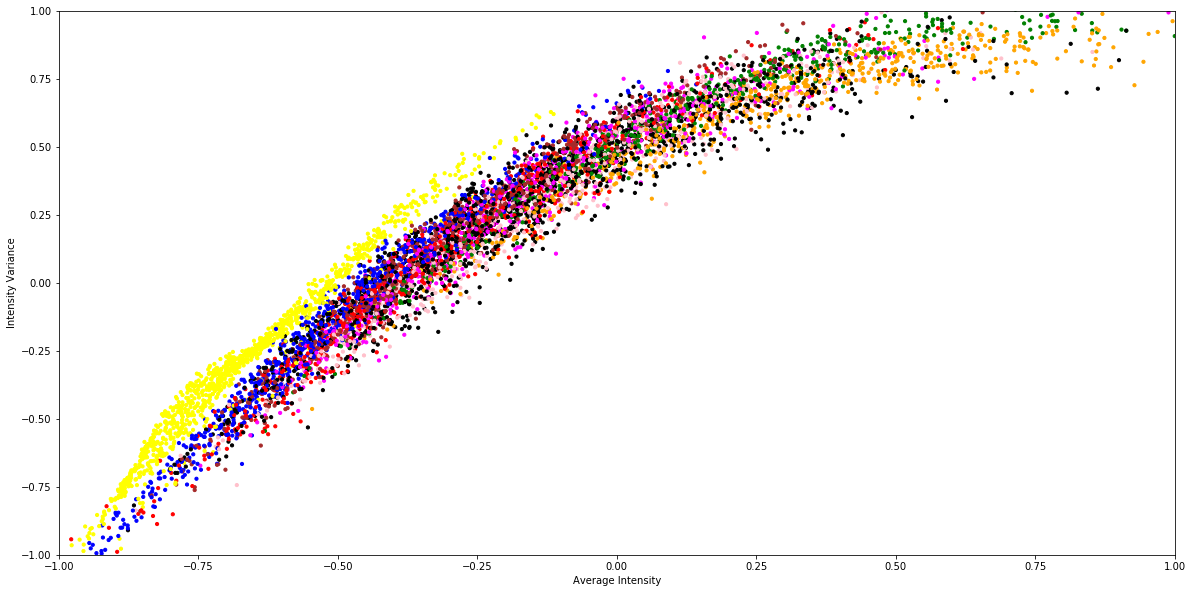

In [89]:
X = []
Y = []
simple = []
colors = []

for index in range(len(features)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(features[index])+.75
    yNew = 3*np.var(features[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simple.append([xNew,yNew])

    if(labels_c[index]== 1):
        colors.append("blue")
    elif(labels_c[index]== 2):
        colors.append("red")
    elif(labels_c[index]== 3):
        colors.append("green")
    elif(labels_c[index]== 4):
        colors.append("magenta")
    elif(labels_c[index]== 5):
        colors.append("yellow")
    elif(labels_c[index]== 6):
        colors.append("pink")
    elif(labels_c[index]== 7):
        colors.append("black")
    elif(labels_c[index]== 8):
        colors.append("orange")
    elif(labels_c[index]== 9):
        colors.append("k")
    else:
        colors.append("brown")

plt.figure(figsize=(20, 10))
plt.scatter(X,Y,s=10,c=colors)

#specify the axes
plt.xlim(-1,1)
plt.xlabel("Average Intensity")
plt.ylim(-1,1)
plt.ylabel("Intensity Variance")


#display the current graph
plt.show()

# No. Apart from one cluster, the two features are not seperating the remaining 9 clusters effectively as you can see there is an overlapping of clusters in this representation. These features are good for classification purpose not clustering.

In [67]:
# color_labels = data_c['Label'].unique()

# # List of RGB triplets
# rgb_values = sns.color_palette("Set2", 10)

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))
# plt.figure(figsize=(20, 10))
# # Finally use the mapped values
# plt.scatter(data_c['X'], data_c['Y'], s = 5,c=data_c['Label'].map(color_map))

In [68]:
# plt.figure(figsize=(20, 10))
# fig = plt.gcf()
# fig.set_size_inches(20, 8)
# sns.lmplot(data=data_c, x='X', y='Y', hue='Label',fit_reg=False, legend=True, legend_out=True)

# Extra Credit Question

In [96]:
model_e = KMeans(n_clusters = 10, init = 'random')
model_e.fit(x)
clusters_e = model_e.labels_


# Unlike supervised training, We cannot calculate the accuracy of an unsupervised learning technique using ground truth. Because the unsupervised technique assigns different clusters to the observations every time  

# So, I am using Adjusted Rand index which can be used to calculate the accuracy of unsupervised learning

In [95]:
metrics.adjusted_rand_score(y[0],clusters_e)

0.5584102872611092

# The accuracy of the 10 KMeans clustering is low compared to the previous supervised learning techniques.
# It makes sense because unsupervised learning finds the patterns in the data without using the classes (labels) and clusters them and these clusters could be different from the classes (labels) where as the supervised learning builds models using the labels

In [92]:
acc =[]
n_clusters = range(2,33)
for i in n_clusters:
    model3  = KMeans(n_clusters = i,init = 'random', n_jobs = -1)
    model3.fit(x)
    clusters3 = model3.labels_
    acc.append(metrics.adjusted_rand_score(y[0],clusters3))

Text(0.5, 1.0, 'Figure')

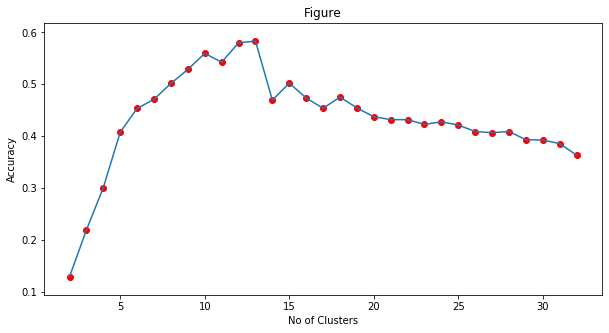

In [93]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n_clusters, acc, c ='r')
ax.plot(n_clusters,acc)
plt.xlabel("No of Clusters")
plt.ylabel("Accuracy")
plt.title("Figure")

In [94]:
maximum(n_clusters, acc)

13

# I got highest accuracy for the no of clusters = 13